In [6]:
#importing data manipulation libraries
import pandas as pd
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#importing logging
import logging
logging.basicConfig(filename = 'model.log', level = logging.INFO,filemode='w', format = '%(asctime)s %(levelname)s %(message)s')

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
url="https://raw.githubusercontent.com/Frisk516/mobile_prices_MLModel/refs/heads/main/Cellphone.csv"
df=pd.read_csv(url,sep=',')
df.sample(frac=1)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
81,1026,791,106,66.0,1.5,121,1,0.208,0.000,0.004,0.00,0.0,800,13.2
9,1103,2580,15,145.0,5.1,432,4,2.500,16.000,2.000,16.00,2.0,2800,8.1
136,301,2445,678,183.0,5.0,294,4,1.300,32.000,3.000,8.00,5.0,4000,8.5
44,974,2859,40,169.0,5.7,515,4,1.875,64.000,4.000,12.00,5.0,3500,7.9
16,187,2258,17,150.0,5.0,441,4,2.300,16.000,2.000,13.00,2.0,2300,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,880,1749,10,125.0,4.0,233,2,1.300,4.000,1.000,3.15,0.0,1700,9.9
43,907,2087,40,147.0,5.0,294,4,1.300,32.000,3.000,8.00,5.0,2450,7.6
11,605,2006,16,161.0,5.5,200,8,1.400,4.000,1.000,5.00,0.0,2500,8.9
126,1198,705,427,110.0,2.2,128,0,0.000,0.128,0.032,2.00,0.0,900,15.6


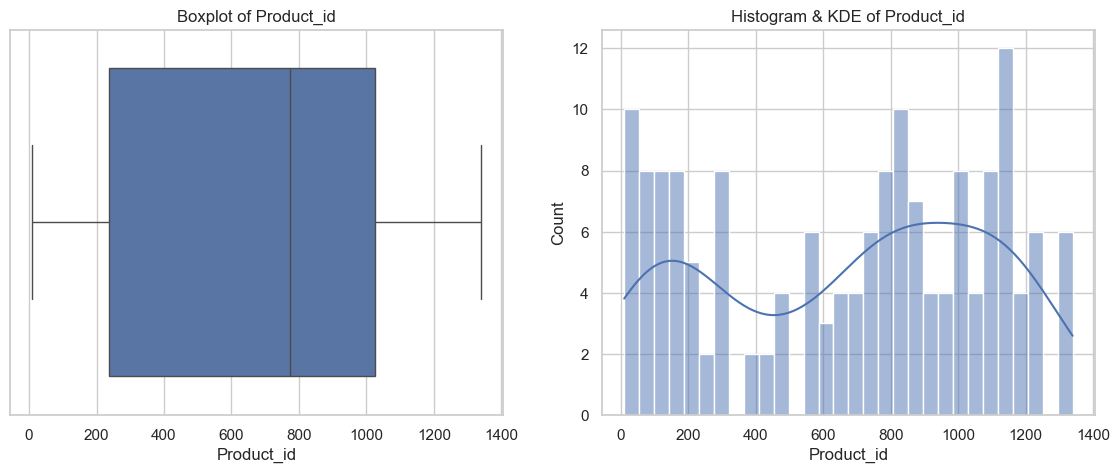

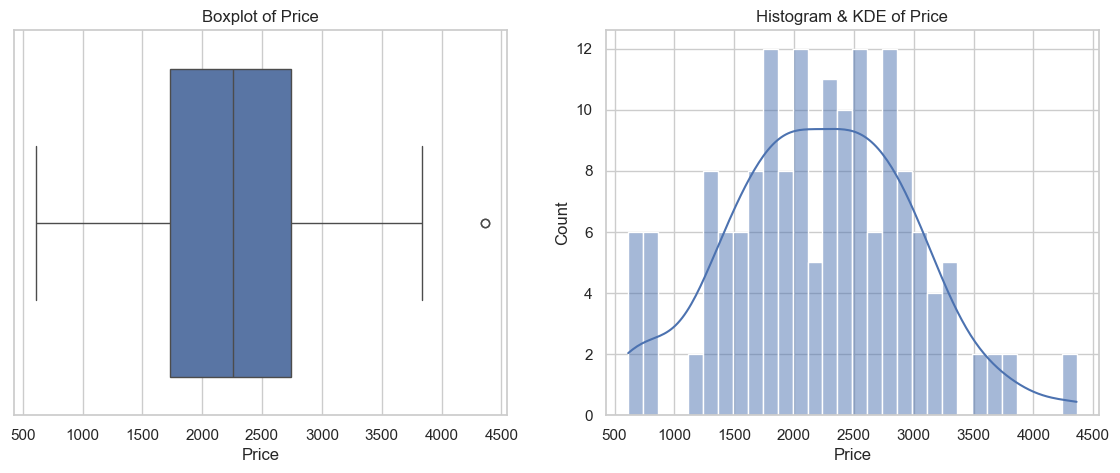

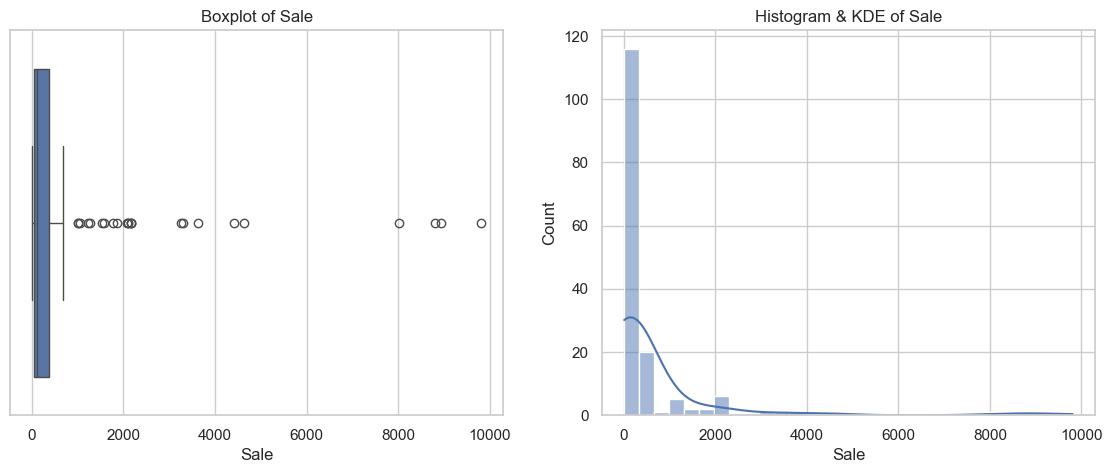

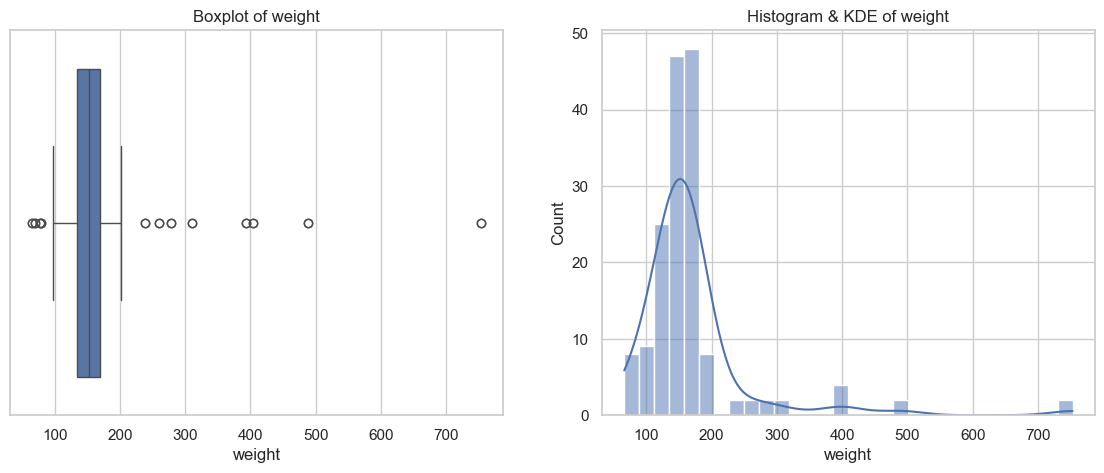

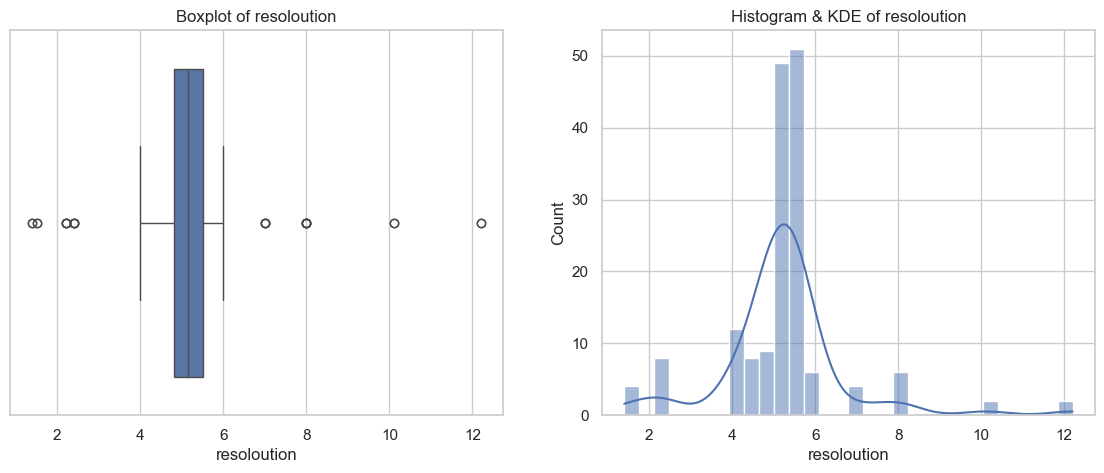

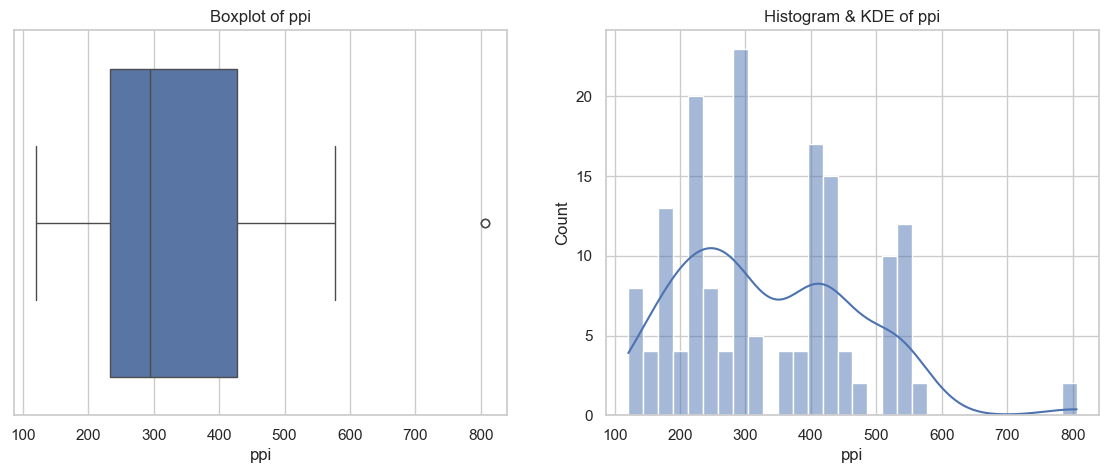

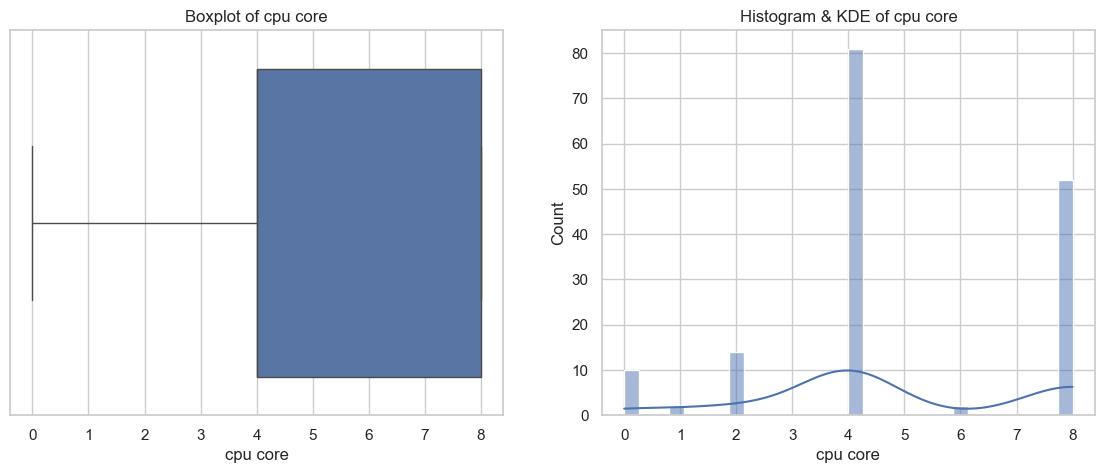

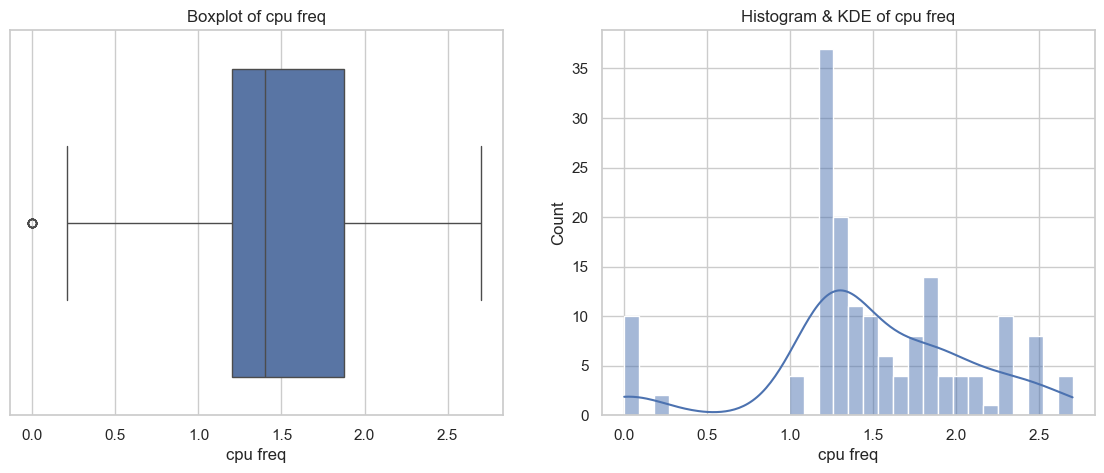

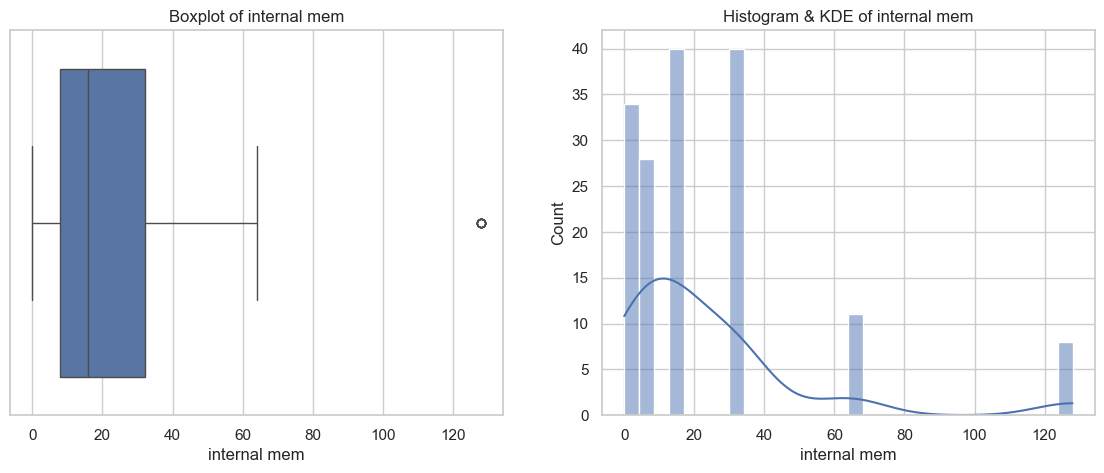

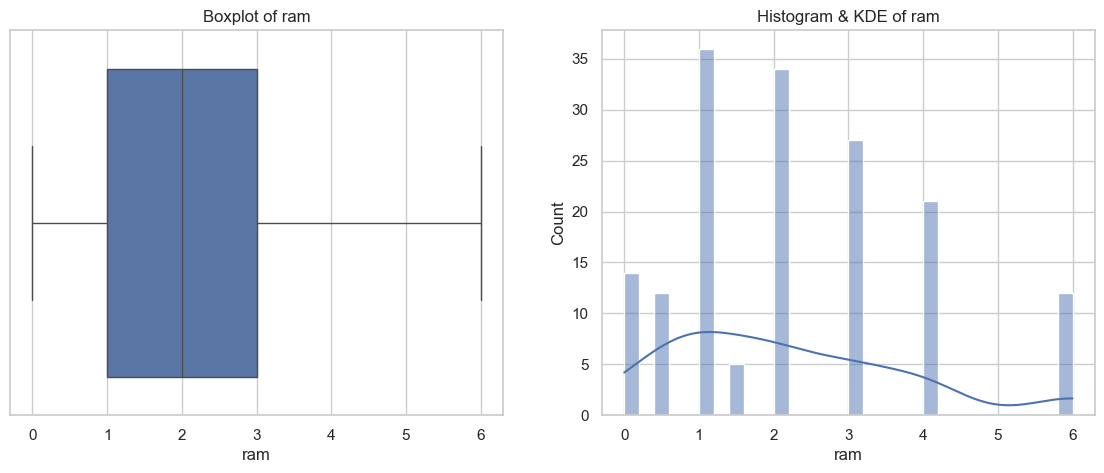

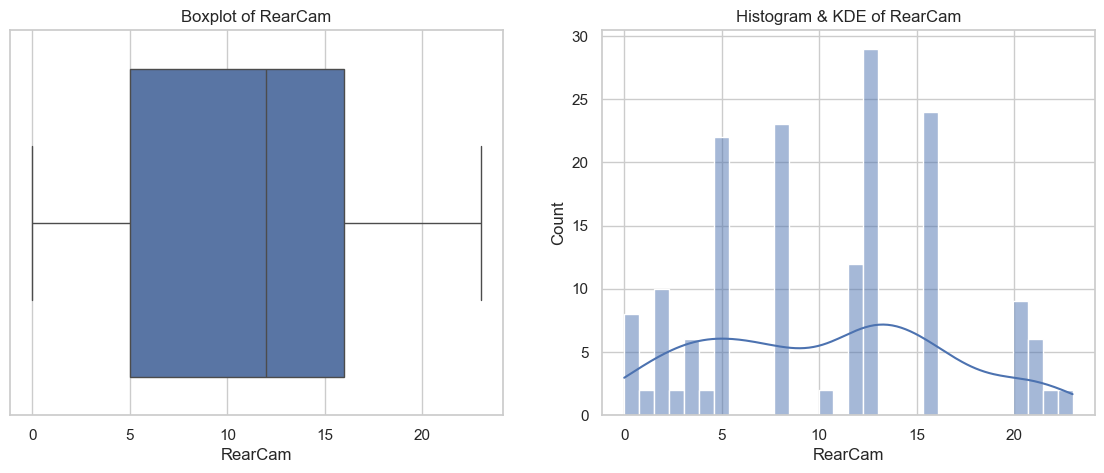

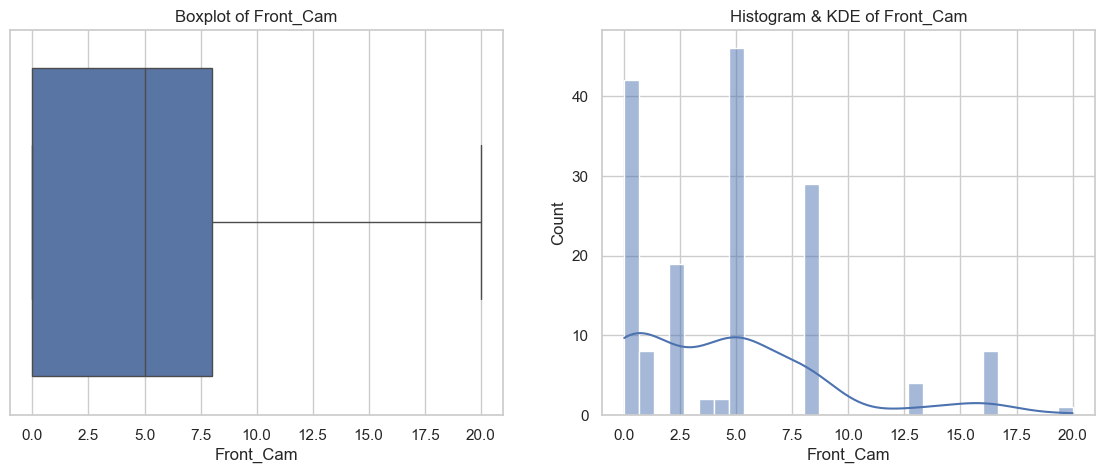

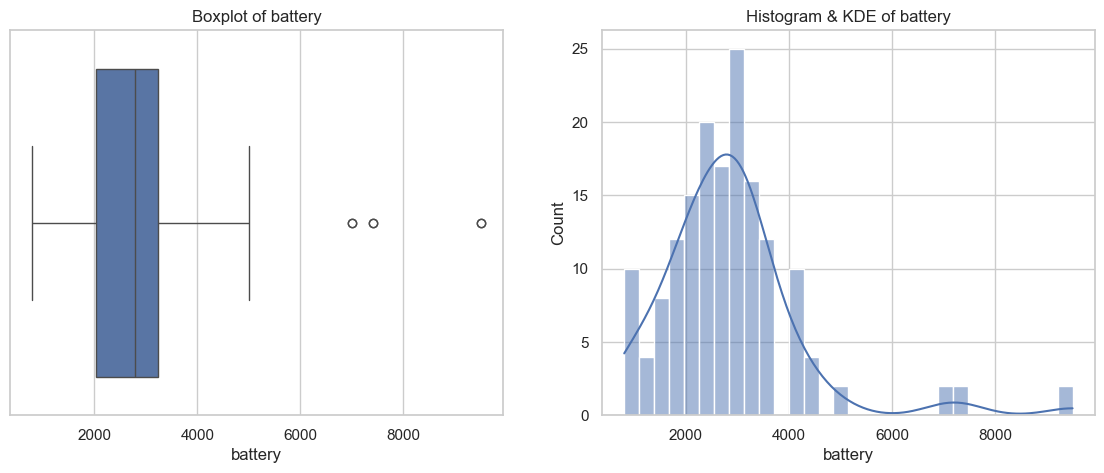

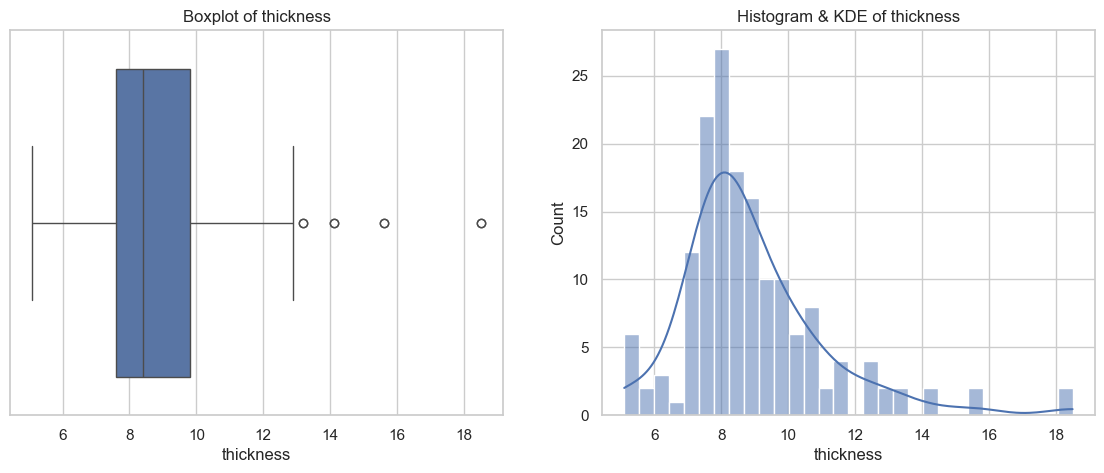

In [8]:
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in df:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [9]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [11]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)


In [12]:
#trying minmax scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
#using linear regression

from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

0.932687839926145

In [14]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)
print(f'The R2 Score for ',r2_score_RF)

The R2 Score for  0.9424468277658654


In [15]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred_DT)
r2_score_DT

0.907370667912607

In [16]:
import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model: {r2_score_XGB}')

The R2 Score for XGBoost Model: 0.946155309677124


In [17]:
from sklearn.ensemble import AdaBoostRegressor
ADA=AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model: {r2_score_ADA}')

The R2 Score for AdaBoost Model: 0.9482968642972107


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
model=RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [25,50,100, 200, 300, 400,500],'max_depth': [None, 10,20,30,40,50]}

#Grid Search Cv
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

#print result
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'n_estimators': 500}
R2 Score: 0.9439880454336659


In [ ]:
#random forest gave the best result